# Introduction

About this Dataset
https://www.kaggle.com/datasets/utathya/smart-city-traffic-patterns

Context
Mission
You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

Content
Data Acquired from a competition I took part in outside Kaggle. It is closed now.

Acknowledgements
Mckinsey Analytics Online Hackathon

# Methed

1.Descriptive statistics
Descriptive statistics is a branch of statistics that involves summarizing and describing the main features of a dataset. It provides a snapshot of the data, highlighting its central tendencies, variability, and distribution.

2.Z-Score
Z-score, also known as a standard score, is a statistical measure that indicates how many standard deviations a data point is from the mean of a distribution. It's a way to standardize data, making it easier to compare values from different distributions.

3.Independent Sample T test
An independent samples t-test is a statistical test used to compare the means of two independent groups. It helps determine whether there is a significant difference between the average values of the two groups.   

4.Time series
A time series is a sequence of data points indexed in time order. Each data point corresponds to a specific time instant. This type of data is ubiquitous, found in various fields like finance, economics, meteorology, and engineering.

5.ARIMA model
Stands for AutoRegressive Integrated Moving Average. It's a powerful statistical method used for analyzing and forecasting time series data. Time series data is a sequence of observations recorded over time, like daily stock prices, monthly sales figures, or hourly temperature readings.

# Data display

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load datasets
test = pd.read_csv('/kaggle/input/smart-city-traffic-patterns/test_BdBKkAj.csv')
train = pd.read_csv('/kaggle/input/smart-city-traffic-patterns/train_aWnotuB.csv')

In [3]:
test.head(10)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
5,2017-07-01 05:00:00,1,20170701051
6,2017-07-01 06:00:00,1,20170701061
7,2017-07-01 07:00:00,1,20170701071
8,2017-07-01 08:00:00,1,20170701081
9,2017-07-01 09:00:00,1,20170701091


In [4]:
train.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
train.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


# Descriptive statistics

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


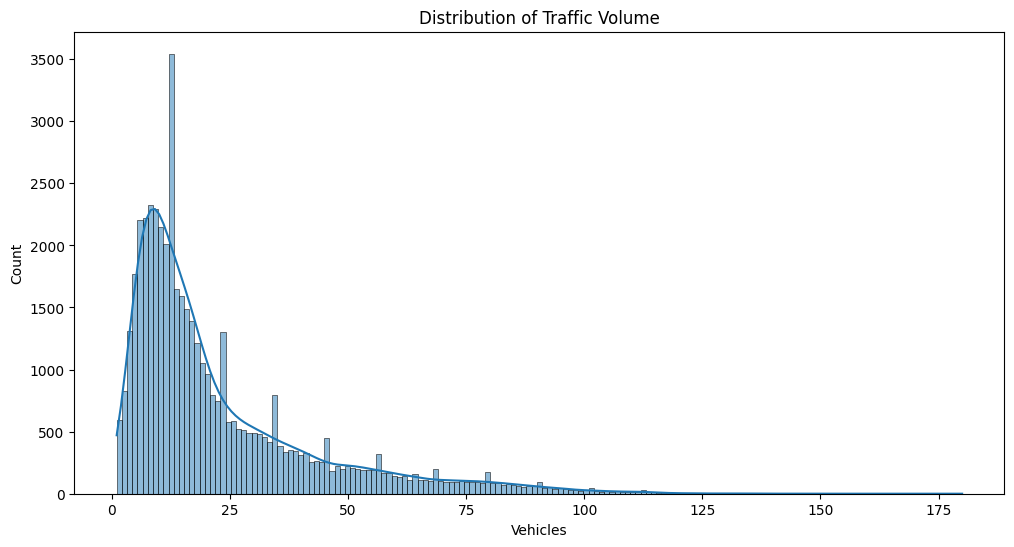

In [6]:
# Choose column to display
x = train['DateTime']
y = train['Vehicles']

# Histogram of traffic volume
plt.figure(figsize=(12,6))
sns.histplot(y, kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

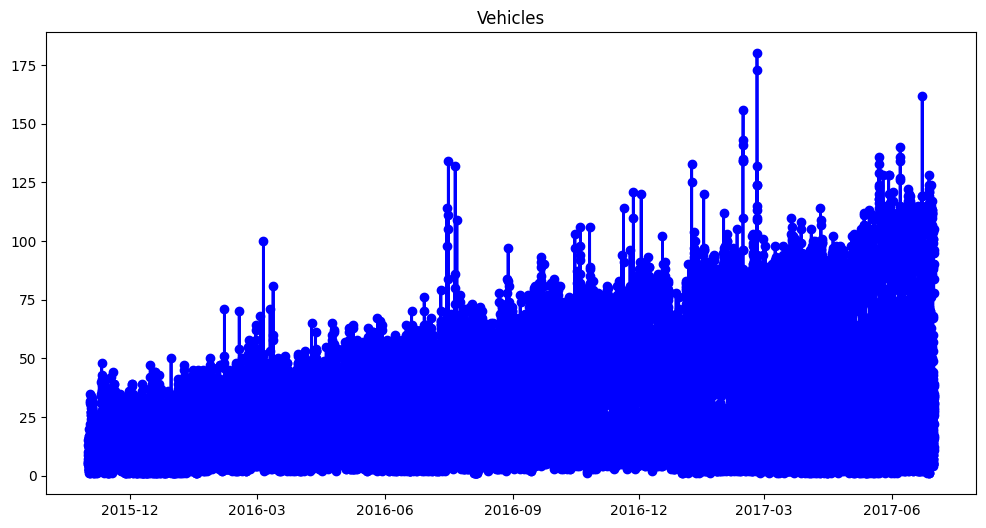

In [7]:
# Choose column to display
x = train['DateTime']
y = train['Vehicles']

# Datetime and plot setting 
x = pd.to_datetime(x)
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='blue', linewidth=2, marker='o')

# Set xlabel by year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Vehicles')

plt.show()

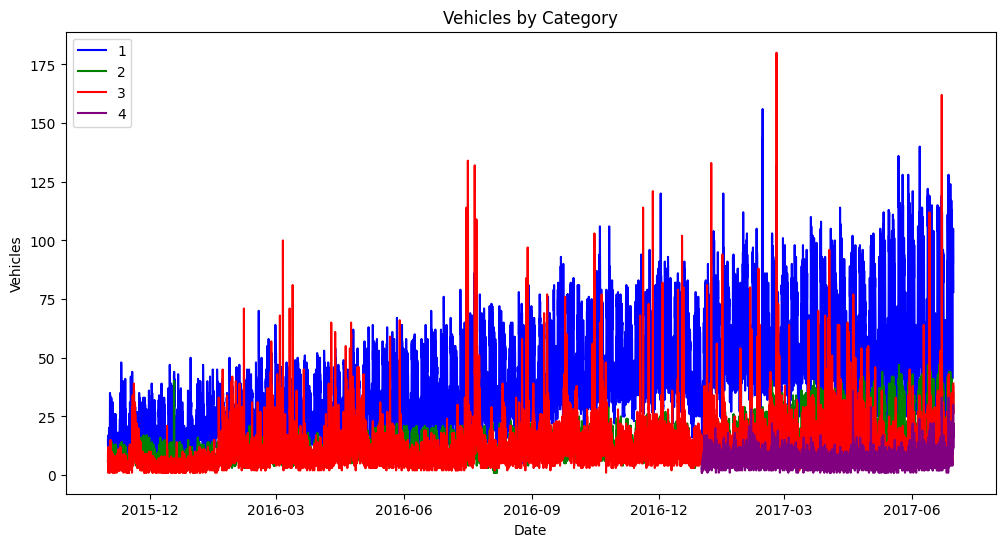

In [8]:
# Pandas.cut by junction
grouped = train.groupby('Junction')

# Set colors
colors = ['blue', 'green', 'red', 'purple']

# Plt.plot
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    plt.plot(pd.to_datetime(group['DateTime']), group['Vehicles'], color=colors[i], label=name)

# X Set xlabel by datetime
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the title and label
plt.title('Vehicles by Category')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.legend()

plt.show()

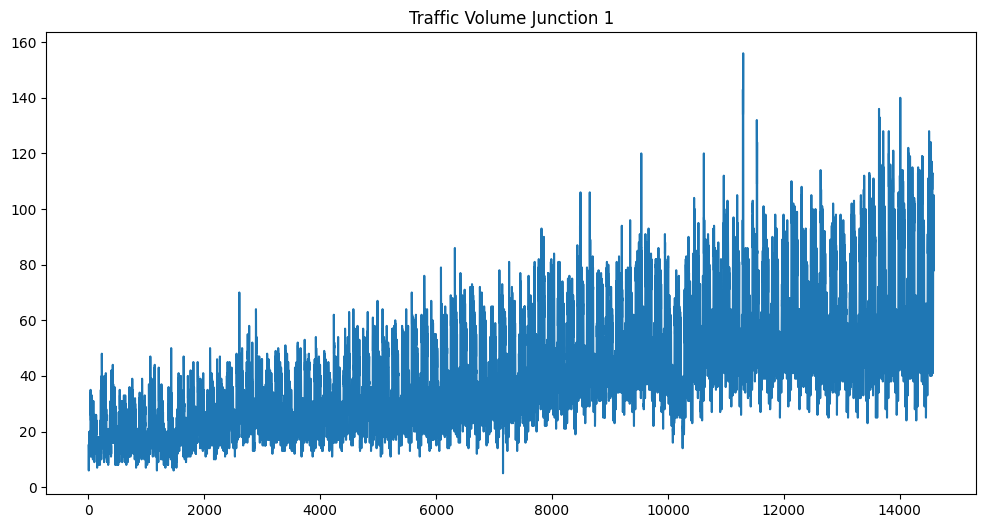

In [9]:
# Timing diagram
plt.figure(figsize=(12, 6))
plt.plot(y[train['Junction'] == 1])
plt.title('Traffic Volume Junction 1')
plt.show()

# Z-Score

In [10]:
from scipy import stats

# Find outliers using z-scores
z_scores = np.abs(stats.zscore(train['Vehicles']))
threshold = 3
print(train['Vehicles'][(z_scores > threshold)])

6323      86
7814      89
7818      93
7819      91
7859      90
        ... 
40725    110
40726    103
41634     96
43362    112
43574    162
Name: Vehicles, Length: 988, dtype: int64


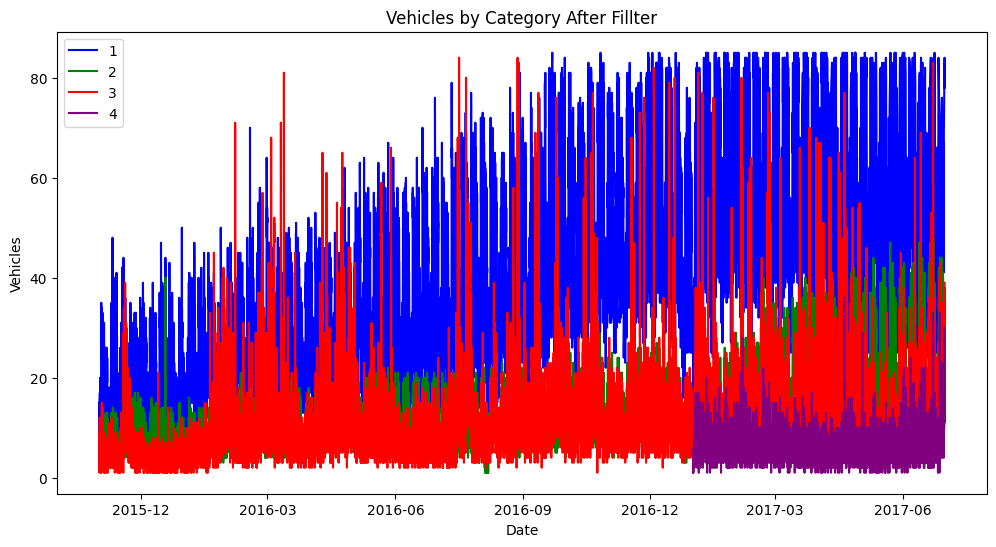

In [11]:
# Filter the DataFrame based on Z-score
filtered_train = train[z_scores < threshold]

# Pandas.cut by junction
grouped = filtered_train.groupby('Junction')

# Set colors
colors = ['blue', 'green', 'red', 'purple']

# Plt.plot
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    plt.plot(pd.to_datetime(group['DateTime']), group['Vehicles'], color=colors[i], label=name)

# X Set xlabel by datetime
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the title and label
plt.title('Vehicles by Category After Fillter')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.legend()

plt.show()

# Independent Sample T test 

In [12]:
import pandas as pd
from scipy import stats

# Filter the DataFrame based on the junction values
junc1 = train[train['Junction'] == 1]
junc3 = train[train['Junction'] == 3]

# Independent sample T-test
t_stat, p_value = stats.ttest_ind(junc1['Vehicles'], junc3['Vehicles'])
print("p_value:", p_value)

# Significant difference test
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two junctions")
else:
    print("There is no significant difference between the two junctions")

p_value: 0.0
There is a significant difference between the two junctions


# Time series

In [13]:
# Time series
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y[train['Junction'] == 1], order=(1,1,1))
model_fit = model.fit()

<Figure size 1200x600 with 0 Axes>

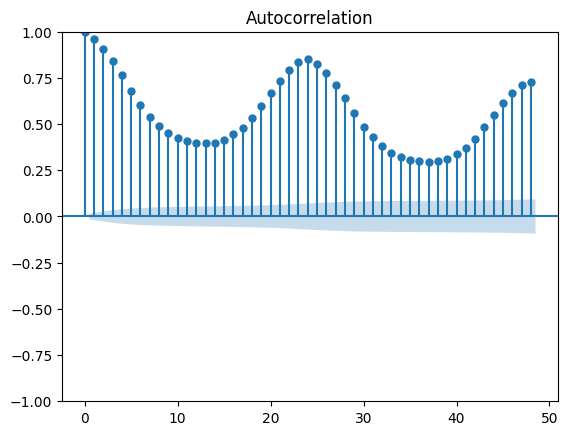

In [14]:
# Autocorrelogram
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(y[train['Junction'] == 1], lags=48)  # Observe autocorrelation over 48 lag periods
plt.show()

                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14592
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -46916.009
Date:                Sun, 03 Nov 2024   AIC                          93838.019
Time:                        15:43:27   BIC                          93860.783
Sample:                             0   HQIC                         93845.582
                              - 14592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5933      0.017     35.418      0.000       0.561       0.626
ma.L1         -0.3689      0.019    -19.250      0.000      -0.407      -0.331
sigma2        36.3404      0.226    160.701      0.0

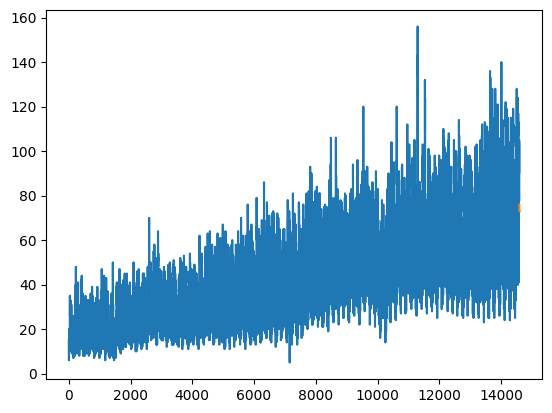

In [15]:
# Show model abstract
print(model_fit.summary())

# Make prediction
forecast = model_fit.forecast(steps=12)
print(forecast)

# Visible
plt.plot(y[train['Junction'] == 1], label='observed')
plt.plot(forecast, label='forecast')
plt.show()

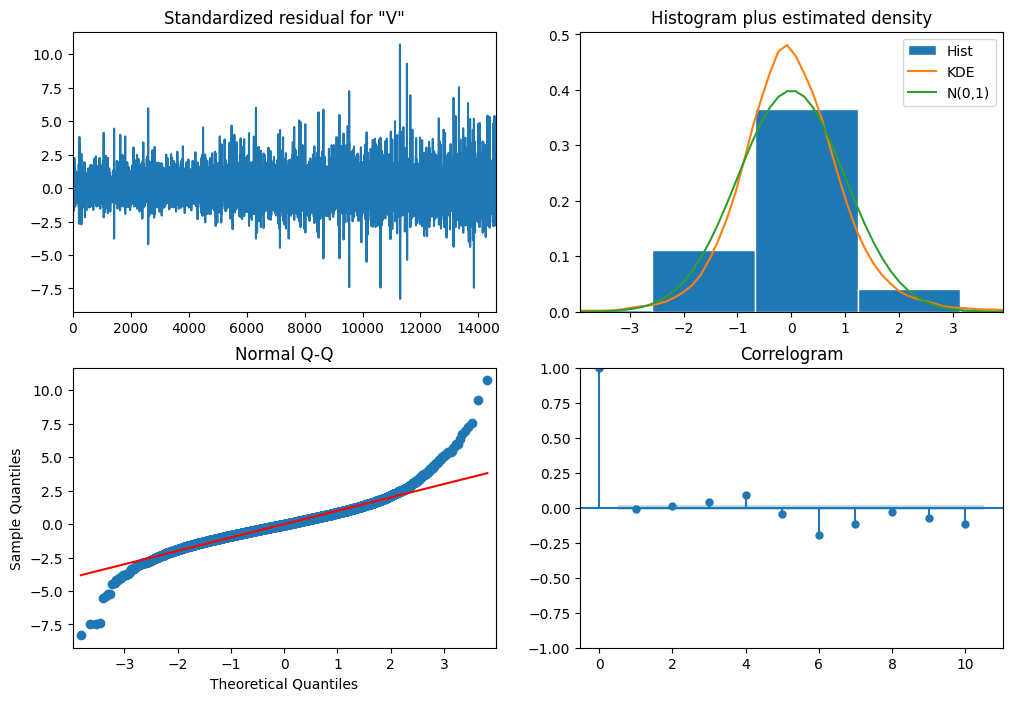

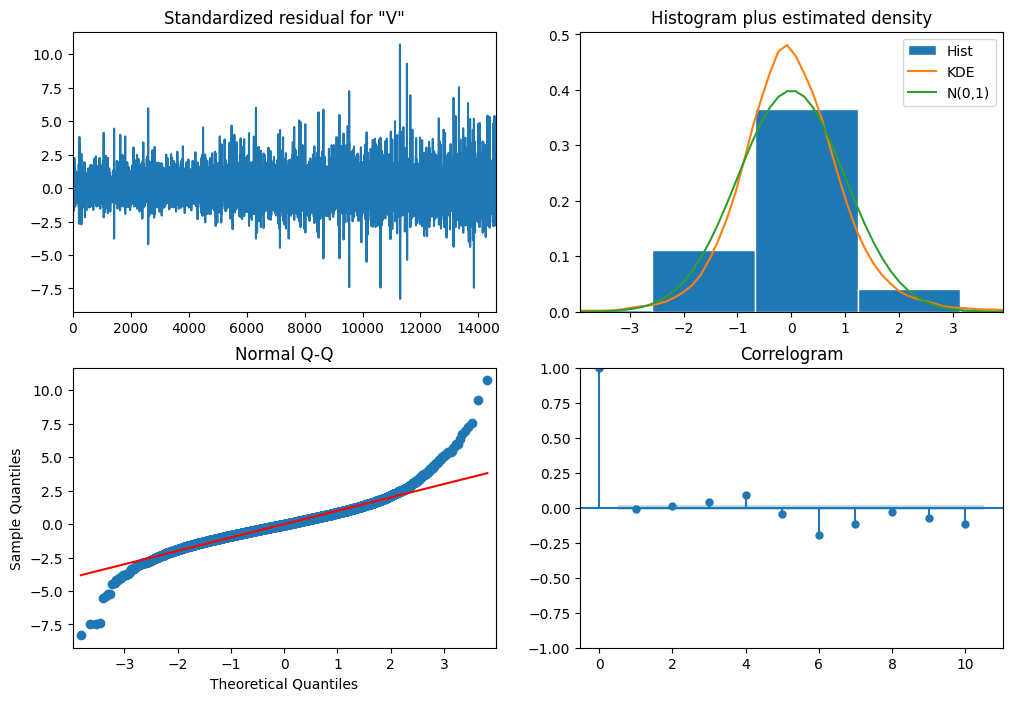

In [16]:
model_fit.plot_diagnostics(figsize=(12, 8))

# Predition

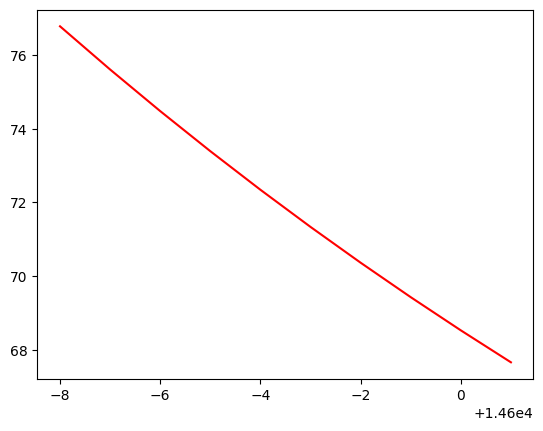

In [17]:
# Establish ARIMA model
model = ARIMA(junc1['Vehicles'], order=(1,0,0))  # p, d, q 為模型參數
model_fit = model.fit()

# Make prediction
forecast = model_fit.forecast(steps=10)

# Visiualize
plt.plot(forecast, color='red')
plt.show()

# Conclusion

1.According to the traffic flow distribution, the peak distribution is between 0-25, and above 25, there is a long-tail distribution.
2.Some extreme values ​​can be shaved off through z-scores.
3.According to independent sample t test, there are significant differences in data between different junctions.
4.The arima model can analyze traffic volume periodicity and make future predictions.

# Future work

Although it can perform basic analysis of past data patterns and provide basic predictions for the future, in the future it should be able to strengthen its model explanation capabilities and have a clearer grasp of causal relationships.